In [1]:
import pandas as pd

df = pd.read_csv('./predicted_eta.csv')
unique_error_bins = df['error_bin'].unique()

print(unique_error_bins)


KeyError: 'error_bin'

In [ ]:
# Get unique patterns for filtered_df_1
unique_patterns_1 = df[['party_size', 'hour', 'month', 'high_chair_size', 'queue_size','weekday']].drop_duplicates()

print(unique_patterns_1)

       party_size  hour  month  high_chair_size  queue_size  weekday
0             4.0    21     10                0           1        5
1             4.0    21     10                0           2        5
2             4.0    21     10                0           3        5
3             3.0    21     10                0           4        5
4             2.0    21     10                0           1        5
...           ...   ...    ...              ...         ...      ...
77340         7.0     1      6                0           3        6
77341         5.0     1      6                0           4        6
77342         2.0     1      7                0           1        2
77343         3.0     1      7                0           1        3
77344         6.0     1      7                0           2        3

[10403 rows x 6 columns]


In [ ]:
with open('pattern_analysis.txt', 'w') as file:
    for index, row in unique_patterns_1.iterrows():
        pattern_1 = row[['party_size', 'hour', 'month', 'high_chair_size', 'queue_size','weekday']]
        pattern_filter_1 = (df['party_size'] == pattern_1['party_size']) & \
                           (df['hour'] == pattern_1['hour']) & \
                           (df['month'] == pattern_1['month']) & \
                           (df['high_chair_size'] == pattern_1['high_chair_size']) & \
                           (df['queue_size'] == pattern_1['queue_size']) & \
                           (df['weekday'] == pattern_1['weekday'])
        etas = df[pattern_filter_1]['ETA']
        pred_etas = df[pattern_filter_1]['predicted_eta']
        error_bin = df[pattern_filter_1]['error_bin']
        most_occurred_bin = error_bin.mode().iloc[0] if not error_bin.mode().empty else None

        # Write the output to the file
        file.write(f"Pattern: \n{pattern_1}\n")
        file.write(f"ETA values: {etas.tolist()}\n")
        file.write(f"Predicted ETA: {pred_etas.tolist()}\n")
        file.write(f"Error bin: {error_bin.tolist()}\n")
        file.write(f"Count of ETA: {len(etas)}\n")
        file.write(f"Most occurred error bin: {most_occurred_bin}\n\n")

print("Pattern analysis saved to pattern_analysis.txt")

Pattern analysis saved to pattern_analysis.txt


In [ ]:
# Categorize bins as negative and positive
df['bin_category'] = df['error_bin'].apply(lambda x: 'negative' if x.startswith('-') else 'positive')

# Count occurrences by bin category
bin_counts = df['bin_category'].value_counts()

# Print or use the counts
print("Negative Error Bins:")
negative_bins = df[df['bin_category'] == 'negative']['error_bin'].value_counts()
print(negative_bins)

print("\nPositive Error Bins:")
positive_bins = df[df['bin_category'] == 'positive']['error_bin'].value_counts()
print(positive_bins)

Negative Error Bins:
error_bin
-3 to 1             72777
-8 to -3             2082
-13 to -8             344
-18 to -13             91
-23 to -18             38
-28 to -23             22
-33 to -28             22
-38 to -33             15
-48 to -43              8
-43 to -38              7
-58 to -53              6
-53 to -48              6
-83 to -78              4
-73 to -68              3
-578 to -573            3
-68 to -63              3
-63 to -58              3
-188 to -183            2
-398 to -393            2
-93 to -88              2
-203 to -198            1
-113 to -108            1
-2363 to -2358          1
-478 to -473            1
-628 to -623            1
-118 to -113            1
-3933 to -3928          1
-11408 to -11403        1
-183 to -178            1
-87543 to -87538        1
-563 to -558            1
Name: count, dtype: int64

Positive Error Bins:
error_bin
1 to 6        1138
6 to 11        381
11 to 16       122
16 to 21        69
21 to 26        43
26 to 31  

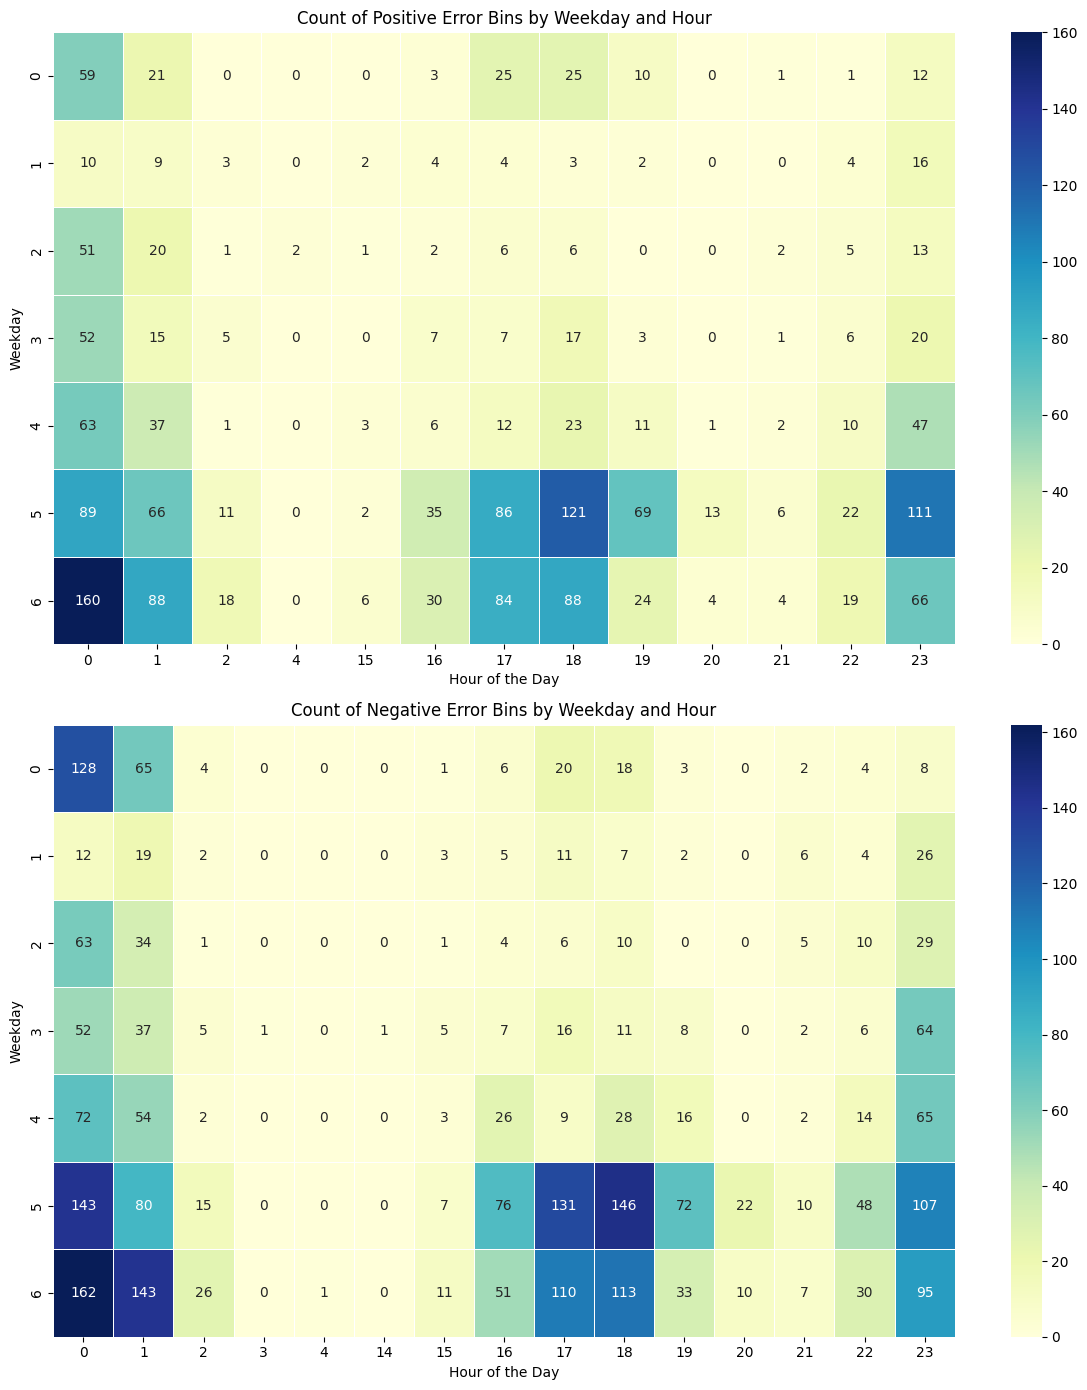

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
data = pd.read_csv('C:\\Users\\Admin\\Downloads\\ETA_checkin\\ETA_checkin\\predicted_eta_binned.csv')

# Define a function to categorize error bins
def categorize_error_bin(error_bin):
    if 'to' in error_bin:  # Assuming 'to' separates the range
        lower, upper = map(int, error_bin.split(' to '))
        if lower < 0 and upper < 0:
            return 'Negative'
        elif lower > 0 and upper > 0:
            return 'Positive'
        else:
            return 'Mixed'  # Handle mixed ranges if any
    else:
        return 'Other'  # Handle unexpected formats

# Apply the function to create a new column 'error_bin_category'
data['error_bin_category'] = data['error_bin'].apply(categorize_error_bin)

# Filter data for positive and negative error bins
positive_error_data = data[data['error_bin_category'] == 'Positive']
negative_error_data = data[data['error_bin_category'] == 'Negative']

# Group data by weekday and hour, count the occurrences
positive_weekday_hour = positive_error_data.groupby(['weekday', 'hour']).size().unstack(fill_value=0)
negative_weekday_hour = negative_error_data.groupby(['weekday', 'hour']).size().unstack(fill_value=0)

# Plot heatmaps
fig, axs = plt.subplots(2, 1, figsize=(12, 14))

# Plot 1: Positive Error Bins
sns.heatmap(positive_weekday_hour, cmap='YlGnBu', annot=True, fmt="d", linewidths=.5, ax=axs[0])
axs[0].set_title('Count of Positive Error Bins by Weekday and Hour')
axs[0].set_xlabel('Hour of the Day')
axs[0].set_ylabel('Weekday')

# Plot 2: Negative Error Bins
sns.heatmap(negative_weekday_hour, cmap='YlGnBu', annot=True, fmt="d", linewidths=.5, ax=axs[1])
axs[1].set_title('Count of Negative Error Bins by Weekday and Hour')
axs[1].set_xlabel('Hour of the Day')
axs[1].set_ylabel('Weekday')

# Adjust layout and display plots
plt.tight_layout()
plt.show()


## try


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import OneHotEncoder
import time

# Load the data
data = pd.read_csv('C:\\Users\\Admin\\Downloads\\ETA_checkin\\ETA_checkin\\results\\model_input.csv')

# Convert reservation_time to datetime
data['reservation_time'] = pd.to_datetime(data['reservation_time'])

# Extract month, hour, and weekday from reservation_time
data['month'] = data['reservation_time'].dt.month
data['hour'] = data['reservation_time'].dt.hour
data['weekday'] = data['reservation_time'].dt.weekday

# One-hot encode categorical features
month_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
month_encoded = month_encoder.fit_transform(data[['month']])
month_encoded_df = pd.DataFrame(month_encoded.toarray(), columns=month_encoder.get_feature_names_out(['month']), index=data.index)

high_chair_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
high_chair_encoded = high_chair_encoder.fit_transform(data[['high_chair_size']])
high_chair_encoded_df = pd.DataFrame(high_chair_encoded.toarray(), columns=high_chair_encoder.get_feature_names_out(['high_chair_size']), index=data.index)

weekday_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
weekday_encoded = weekday_encoder.fit_transform(data[['weekday']])
weekday_encoded_df = pd.DataFrame(weekday_encoded.toarray(), columns=weekday_encoder.get_feature_names_out(['weekday']), index=data.index)

# Combine all encoded features with the original data
data_encoded = pd.concat([data, month_encoded_df, high_chair_encoded_df, weekday_encoded_df], axis=1)

# Define features including the hour and weekday features
features = ['party_size', 'queue_size', 'hour'] + list(month_encoded_df.columns) + list(high_chair_encoded_df.columns) + list(weekday_encoded_df.columns)
target = 'ETA'

# Function to handle negative and zero ETA values
def handle_negative_zero(df):
    df['ETA'] = df['ETA'].apply(lambda x: max(x, 0))
    return df

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree Regression': DecisionTreeRegressor(random_state=42),
    'XGBoost Regression': XGBRegressor(random_state=42)
}

# Store results and model objects
results = {}
model_objects = {}

# Iterate over each model
for model_name, model in models.items():
    start_time = time.time()  # Start time for computation time

    # Create a copy of the data
    df_processed = data_encoded.copy()

    # Handle negative and zero ETA values
    df_processed = handle_negative_zero(df_processed)

    # Define features (X) and target (y)
    X = df_processed[features]
    y = df_processed[target]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate mean absolute error
    mae = mean_absolute_error(y_test, y_pred)

    end_time = time.time()  # End time for computation time
    computation_time = end_time - start_time

    # Store results and model object
    results[model_name] = {
        'MAE': mae,
        'Computation Time': computation_time
    }
    model_objects[model_name] = model

# Determine the best model based on MAE and computation time
best_model_name = None
best_mae = float('inf')
best_computation_time = float('inf')

for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"MAE = {metrics['MAE']:.2f}, Computation Time = {metrics['Computation Time']:.4f} seconds")
    if metrics['MAE'] < best_mae or (metrics['MAE'] == best_mae and metrics['Computation Time'] < best_computation_time):
        best_model_name = model_name
        best_mae = metrics['MAE']
        best_computation_time = metrics['Computation Time']

best_model = model_objects[best_model_name]

print(f"\nBest Model: {best_model_name}")
print(f"Best MAE: {best_mae:.2f}")
print(f"Computation Time: {best_computation_time:.4f} seconds")

 # Ensure `features` matches the expected feature order



Model: Linear Regression
MAE = 0.95, Computation Time = 0.1663 seconds
Model: Ridge Regression
MAE = 0.95, Computation Time = 0.2084 seconds
Model: Lasso Regression
MAE = 0.98, Computation Time = 0.4126 seconds
Model: Decision Tree Regression
MAE = 0.80, Computation Time = 0.1620 seconds
Model: XGBoost Regression
MAE = 0.81, Computation Time = 0.4042 seconds

Best Model: Decision Tree Regression
Best MAE: 0.80
Computation Time: 0.1620 seconds


In [38]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Step 1: Predict with the best model
y_pred_initial = best_model.predict(X_test)

# Step 2: Calculate residuals
residuals = y_test - y_pred_initial

# Step 3: Train XGBoost model on residuals
xgb_residual_model = XGBRegressor(random_state=42)
xgb_residual_model.fit(X_test, residuals)

# Step 4: Predict updated ETA using both models
updated_predictions = y_pred_initial + xgb_residual_model.predict(X_test)

# Evaluate updated predictions
updated_mae = mean_absolute_error(y_test, updated_predictions)
updated_rmse = np.sqrt(mean_squared_error(y_test, updated_predictions))

print(f"Updated MAE: {updated_mae:.2f}")
print(f"Updated RMSE: {updated_rmse:.2f}")



Updated MAE: 0.37
Updated RMSE: 1.90


## Synthetic data

In [14]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
import time

# Load the training data
train_data = pd.read_csv('C:\\Users\\Admin\\Downloads\\train.csv')  # Update with the actual path to your train file

# Convert reservation_time to datetime
train_data['reservation_time'] = pd.to_datetime(train_data['reservation_time'])

# Extract month, hour, and weekday from reservation_time
train_data['month'] = train_data['reservation_time'].dt.month
train_data['hour'] = train_data['reservation_time'].dt.hour
train_data['weekday'] = train_data['reservation_time'].dt.weekday

# One-hot encode categorical features
def encode_features(data):
    month_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
    month_encoded = month_encoder.fit_transform(data[['month']])
    month_encoded_df = pd.DataFrame(month_encoded.toarray(), columns=month_encoder.get_feature_names_out(['month']), index=data.index)

    high_chair_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
    high_chair_encoded = high_chair_encoder.fit_transform(data[['high_chair_size']])
    high_chair_encoded_df = pd.DataFrame(high_chair_encoded.toarray(), columns=high_chair_encoder.get_feature_names_out(['high_chair_size']), index=data.index)

    weekday_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
    weekday_encoded = weekday_encoder.fit_transform(data[['weekday']])
    weekday_encoded_df = pd.DataFrame(weekday_encoded.toarray(), columns=weekday_encoder.get_feature_names_out(['weekday']), index=data.index)

    season_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
    season_encoded = season_encoder.fit_transform(data[['season']])
    season_encoded_df = pd.DataFrame(season_encoded.toarray(), columns=season_encoder.get_feature_names_out(['season']), index=data.index)

    data_encoded = pd.concat([data, month_encoded_df, high_chair_encoded_df, weekday_encoded_df, season_encoded_df], axis=1)
    return data_encoded, month_encoder, high_chair_encoder, weekday_encoder, season_encoder

train_data_encoded, month_encoder, high_chair_encoder, weekday_encoder, season_encoder = encode_features(train_data)

# Define features including the hour and weekday features
features = ['party_size', 'queue_size', 'hour'] + list(month_encoder.get_feature_names_out(['month'])) + list(high_chair_encoder.get_feature_names_out(['high_chair_size'])) + list(weekday_encoder.get_feature_names_out(['weekday'])) + list(season_encoder.get_feature_names_out(['season']))
target = 'ETA'

# Function to handle negative and zero ETA values
def handle_negative_zero(df):
    df['ETA'] = df['ETA'].apply(lambda x: max(x, 0))
    return df

# Handle negative and zero ETA values
train_data_encoded = handle_negative_zero(train_data_encoded)

# Define features (X) and target (y)
X_train = train_data_encoded[features]
y_train = train_data_encoded[target]

# Define and train the best model (assuming XGBoost is the best model from your previous analysis)
best_model = XGBRegressor(random_state=42)
best_model.fit(X_train, y_train)

# Load the test pattern data
test_data = pd.read_csv('C:\\Users\\Admin\\Downloads\\test.csv')  # Update with the actual path to your test file

# Function to prepare input data for prediction
def prepare_input_data(input_data, month_encoder, high_chair_encoder, weekday_encoder, season_encoder):
    input_df = pd.DataFrame(input_data)
    input_df['reservation_time'] = pd.to_datetime(input_df['reservation_time'])
    input_df['month'] = input_df['reservation_time'].dt.month
    input_df['hour'] = input_df['reservation_time'].dt.hour
    input_df['weekday'] = input_df['reservation_time'].dt.weekday

    month_encoded = month_encoder.transform(input_df[['month']])
    month_encoded_df = pd.DataFrame(month_encoded.toarray(), columns=month_encoder.get_feature_names_out(['month']), index=input_df.index)

    high_chair_encoded = high_chair_encoder.transform(input_df[['high_chair_size']])
    high_chair_encoded_df = pd.DataFrame(high_chair_encoded.toarray(), columns=high_chair_encoder.get_feature_names_out(['high_chair_size']), index=input_df.index)

    weekday_encoded = weekday_encoder.transform(input_df[['weekday']])
    weekday_encoded_df = pd.DataFrame(weekday_encoded.toarray(), columns=weekday_encoder.get_feature_names_out(['weekday']), index=input_df.index)

    season_encoded = season_encoder.transform(input_df[['season']])
    season_encoded_df = pd.DataFrame(season_encoded.toarray(), columns=season_encoder.get_feature_names_out(['season']), index=input_df.index)

    input_encoded = pd.concat([input_df, month_encoded_df, high_chair_encoded_df, weekday_encoded_df, season_encoded_df], axis=1)
    return input_encoded[features]

# Prepare the test data
X_test = prepare_input_data(test_data, month_encoder, high_chair_encoder, weekday_encoder, season_encoder)

# Predict ETA for the test data
test_data['predicted_ETA'] = best_model.predict(X_test)

# Save the test data with the predicted ETA
test_data.to_csv('C:\\Users\\Admin\\Downloads\\test_with_predicted_ETA.csv', index=False)  # Update with the actual path to your output file

print("ETA prediction for the test data complete.")


ETA prediction for the test data complete.


## MERGED

In [21]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor  # Import XGBoost
from sklearn.preprocessing import OneHotEncoder
import time

# Load the data
data = pd.read_csv('C:\\Users\\Admin\\Downloads\\train.csv')

# Convert reservation_time to datetime
data['reservation_time'] = pd.to_datetime(data['reservation_time'])

# Extract month, hour, and weekday from reservation_time
data['month'] = data['reservation_time'].dt.month
data['hour'] = data['reservation_time'].dt.hour
data['weekday'] = data['reservation_time'].dt.weekday

# One-hot encode the categorical features
month_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
month_encoded = month_encoder.fit_transform(data[['month']])
month_encoded_df = pd.DataFrame(month_encoded.toarray(), columns=month_encoder.get_feature_names_out(['month']), index=data.index)

hour_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
hour_encoded = hour_encoder.fit_transform(data[['hour']])
hour_encoded_df = pd.DataFrame(hour_encoded.toarray(), columns=hour_encoder.get_feature_names_out(['hour']), index=data.index)

weekday_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
weekday_encoded = weekday_encoder.fit_transform(data[['weekday']])
weekday_encoded_df = pd.DataFrame(weekday_encoded.toarray(), columns=weekday_encoder.get_feature_names_out(['weekday']), index=data.index)

high_chair_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
high_chair_encoded = high_chair_encoder.fit_transform(data[['high_chair_size']])
high_chair_encoded_df = pd.DataFrame(high_chair_encoded.toarray(), columns=high_chair_encoder.get_feature_names_out(['high_chair_size']), index=data.index)

# Combine all encoded features with the original data
data_encoded = pd.concat([data, month_encoded_df, hour_encoded_df, weekday_encoded_df, high_chair_encoded_df], axis=1)

# Define features including the hour and weekday features
features = ['party_size', 'queue_size'] + list(month_encoded_df.columns) + list(hour_encoded_df.columns) + list(weekday_encoded_df.columns) + list(high_chair_encoded_df.columns)
target = 'ETA'

# Function to handle negative or zero ETA values
def handle_negative_zero(df):
    df['ETA'] = df['ETA'].apply(lambda x: max(x, 0))
    return df

# Remove rows with missing ETA values
data_encoded = data_encoded.dropna(subset=['ETA'])

# Dictionary of models to be tested
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree Regression': DecisionTreeRegressor(random_state=42),
    'XGBoost Regression': XGBRegressor(random_state=42)  
}

# Training and evaluating models
results = {}
for model_name, model in models.items():
    start_time = time.time()
    df_processed = data_encoded.copy()
    df_processed = handle_negative_zero(df_processed)
    X = df_processed[features]
    y = df_processed[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    end_time = time.time()
    computation_time = end_time - start_time
    results[model_name] = {'MAE': mae, 'Computation Time': computation_time}

# Select the best model based on MAE
best_model = None
best_mae = float('inf')
best_computation_time = float('inf')
for model, metrics in results.items():
    print(f"Model: {model}")
    print(f"MAE = {metrics['MAE']:.2f}, Computation Time = {metrics['Computation Time']:.4f} seconds")
    if metrics['MAE'] < best_mae or (metrics['MAE'] == best_mae and metrics['Computation Time'] < best_computation_time):
        best_model = model
        best_mae = metrics['MAE']
        best_computation_time = metrics['Computation Time']
print(f"\nBest Model: {best_model}")
print(f"Best MAE: {best_mae:.2f}")
print(f"Computation Time: {best_computation_time:.4f} seconds")

# Predicting ETA for each row and calculating the error
best_model_instance = models[best_model]

# Ensure the feature DataFrame includes the non-one-hot encoded columns
data_encoded_features = pd.concat([data[['party_size', 'queue_size']], month_encoded_df, hour_encoded_df, weekday_encoded_df, high_chair_encoded_df], axis=1)

# Predict ETA
data['predicted_eta'] = best_model_instance.predict(data_encoded_features)
data['error'] = data['ETA'] - data['predicted_eta']

# Save the results to a new CSV file
output_path = 'C:\\Users\\Admin\\Downloads\\predicted_eta.csv'
data.to_csv(output_path, index=False)

print(f"Predictions and errors saved to {output_path}")


Model: Linear Regression
MAE = 0.44, Computation Time = 0.8835 seconds
Model: Ridge Regression
MAE = 0.44, Computation Time = 0.4063 seconds
Model: Lasso Regression
MAE = 0.36, Computation Time = 0.2239 seconds
Model: Decision Tree Regression
MAE = 0.12, Computation Time = 0.3459 seconds
Model: XGBoost Regression
MAE = 0.11, Computation Time = 0.6137 seconds

Best Model: XGBoost Regression
Best MAE: 0.11
Computation Time: 0.6137 seconds
Predictions and errors saved to C:\Users\Admin\Downloads\predicted_eta.csv


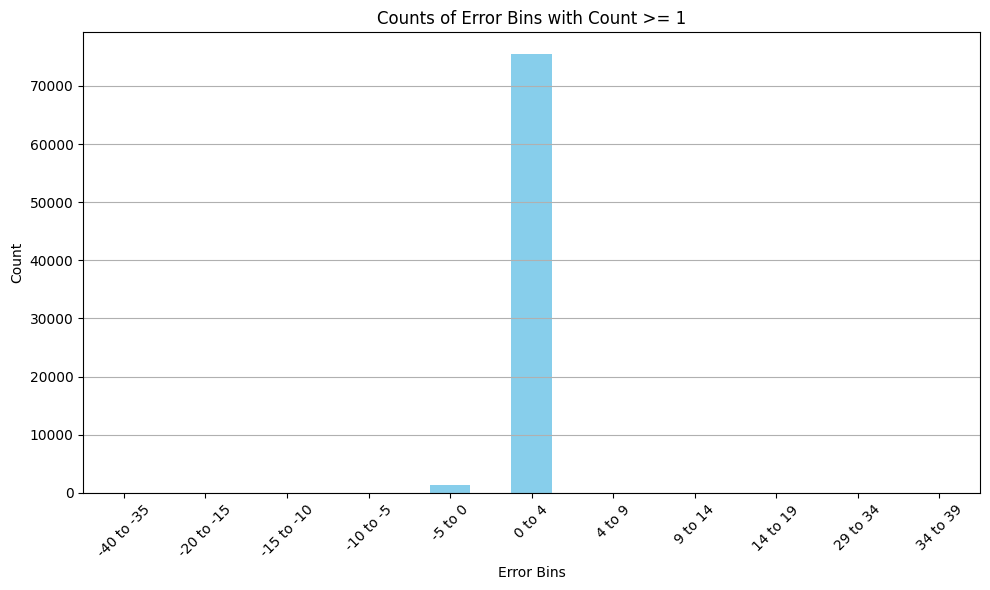

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your actual data
data_path = 'C:\\Users\\Admin\\Downloads\\predicted_eta.csv'  # Replace this with the actual path to your CSV file
data = pd.read_csv(data_path)

min_error = data['error'].min()
max_error = data['error'].max()

# Create bins with 5-unit intervals
bin_edges = np.arange(min_error, max_error + 5, 5)

custom_bin_labels = [f"{int(bin_edges[i])} to {int(bin_edges[i+1])}" for i in range(len(bin_edges)-1)]

data['error_bin'] = pd.cut(data['error'], bins=bin_edges, labels=custom_bin_labels, include_lowest=True, right=False)

bin_counts = data['error_bin'].value_counts().sort_index()

filtered_bins = bin_counts[bin_counts >= 1]

plt.figure(figsize=(10, 6))
filtered_bins.plot(kind='bar', color='skyblue')
plt.xlabel('Error Bins')
plt.ylabel('Count')
plt.title('Counts of Error Bins with Count >= 1')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()




## model training

In [23]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import OneHotEncoder
import time

# Load the data
data = pd.read_csv('C:\\Users\\Admin\\Downloads\\predicted_eta.csv')

# Convert reservation_time to datetime
data['reservation_time'] = pd.to_datetime(data['reservation_time'])

# Extract month, hour, and weekday from reservation_time
data['month'] = data['reservation_time'].dt.month
data['hour'] = data['reservation_time'].dt.hour
data['weekday'] = data['reservation_time'].dt.weekday

# One-hot encode categorical features
month_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
month_encoded = month_encoder.fit_transform(data[['month']])
month_encoded_df = pd.DataFrame(month_encoded.toarray(), columns=month_encoder.get_feature_names_out(['month']), index=data.index)

high_chair_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
high_chair_encoded = high_chair_encoder.fit_transform(data[['high_chair_size']])
high_chair_encoded_df = pd.DataFrame(high_chair_encoded.toarray(), columns=high_chair_encoder.get_feature_names_out(['high_chair_size']), index=data.index)

weekday_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
weekday_encoded = weekday_encoder.fit_transform(data[['weekday']])
weekday_encoded_df = pd.DataFrame(weekday_encoded.toarray(), columns=weekday_encoder.get_feature_names_out(['weekday']), index=data.index)

# Combine all encoded features with the original data
data_encoded = pd.concat([data, month_encoded_df, high_chair_encoded_df, weekday_encoded_df], axis=1)

# Define features including the hour and weekday features
features = ['party_size', 'queue_size', 'hour'] + list(month_encoded_df.columns) + list(high_chair_encoded_df.columns) + list(weekday_encoded_df.columns)
target = 'ETA'

# Function to handle negative and zero ETA values
def handle_negative_zero(df):
    df['ETA'] = df['ETA'].apply(lambda x: max(x, 0))
    return df

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree Regression': DecisionTreeRegressor(random_state=42),
    'XGBoost Regression': XGBRegressor(random_state=42)
}

# Store results
results = {}
model_objects = {}

# Iterate over each model
for model_name, model in models.items():
    start_time = time.time()  # Start time for computation time

    # Create a copy of the data
    df_processed = data_encoded.copy()

    # Handle negative and zero ETA values
    df_processed = handle_negative_zero(df_processed)

    # Define features (X) and target (y)
    X = df_processed[features]
    y = df_processed[target]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate mean absolute error
    mae = mean_absolute_error(y_test, y_pred)

    end_time = time.time()  # End time for computation time
    computation_time = end_time - start_time

    # Store results and model object
    results[model_name] = {
        'MAE': mae,
        'Computation Time': computation_time
    }
    model_objects[model_name] = model

# Determine the best model based on MAE and computation time
best_model_name = None
best_mae = float('inf')
best_computation_time = float('inf')

for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"MAE = {metrics['MAE']:.2f}, Computation Time = {metrics['Computation Time']:.4f} seconds")
    if metrics['MAE'] < best_mae or (metrics['MAE'] == best_mae and metrics['Computation Time'] < best_computation_time):
        best_model_name = model_name
        best_mae = metrics['MAE']
        best_computation_time = metrics['Computation Time']

best_model = model_objects[best_model_name]

print(f"\nBest Model: {best_model_name}")
print(f"Best MAE: {best_mae:.2f}")
print(f"Computation Time: {best_computation_time:.4f} seconds")

# Function to prepare input data for prediction
def prepare_input_data(input_data, month_encoder, high_chair_encoder, weekday_encoder):
    input_df = pd.DataFrame([input_data])
    input_df['reservation_time'] = pd.to_datetime(input_df['reservation_time'])
    input_df['month'] = input_df['reservation_time'].dt.month
    input_df['hour'] = input_df['reservation_time'].dt.hour
    input_df['weekday'] = input_df['reservation_time'].dt.weekday

    month_encoded = month_encoder.transform(input_df[['month']])
    month_encoded_df = pd.DataFrame(month_encoded.toarray(), columns=month_encoder.get_feature_names_out(['month']), index=input_df.index)

    high_chair_encoded = high_chair_encoder.transform(input_df[['high_chair_size']])
    high_chair_encoded_df = pd.DataFrame(high_chair_encoded.toarray(), columns=high_chair_encoder.get_feature_names_out(['high_chair_size']), index=input_df.index)

    weekday_encoded = weekday_encoder.transform(input_df[['weekday']])
    weekday_encoded_df = pd.DataFrame(weekday_encoded.toarray(), columns=weekday_encoder.get_feature_names_out(['weekday']), index=input_df.index)

    input_encoded = pd.concat([input_df, month_encoded_df, high_chair_encoded_df, weekday_encoded_df], axis=1)
    return input_encoded[features]


Model: Linear Regression
MAE = 0.44, Computation Time = 0.4394 seconds
Model: Ridge Regression
MAE = 0.44, Computation Time = 0.2345 seconds
Model: Lasso Regression
MAE = 0.36, Computation Time = 0.1372 seconds
Model: Decision Tree Regression
MAE = 0.12, Computation Time = 0.2227 seconds
Model: XGBoost Regression
MAE = 0.09, Computation Time = 0.3653 seconds

Best Model: XGBoost Regression
Best MAE: 0.09
Computation Time: 0.3653 seconds


In [31]:
# Example input for prediction
input_data = {
    'reservation_time': '2024-07-16 00:30:00',
    'party_size': 1,
    'high_chair_size': 1,
    'queue_size': 3
}

# Prepare the input data
input_encoded = prepare_input_data(input_data, month_encoder, high_chair_encoder, weekday_encoder)

# Predict using the best model
prediction = best_model.predict(input_encoded)
print(f"Predicted ETA: {prediction[0]:.2f} minutes")


Predicted ETA: 3.21 minutes
